In [339]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the ka_dugle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-prediction-dataset/heart_attack_prediction_dataset.csv


# **Project Links**
**[Heart Attack Prediction Dataset](https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset/code/)**
* [User Code 1 (visualization-and-fixing-some-errors)](https://www.kaggle.com/code/philopateergeorgei/visualization-and-fixing-some-errors/)
* [User Code 2 (HeartAttackRisk 🩺 Predictive Analysis)](https://www.kaggle.com/code/nithinreddy90/heartattackrisk-predictive-analysis)

In [340]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from matplotlib import pyplot as plt
from tensorflow.keras import Sequential, layers

In [341]:
# 데이터셋 불러오기
df = pd.read_csv('/kaggle/input/heart-attack-prediction-dataset/heart_attack_prediction_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [342]:
df['Blood Pressure'].info() # 특정 Column에 대한 정보 출력

<class 'pandas.core.series.Series'>
RangeIndex: 8763 entries, 0 to 8762
Series name: Blood Pressure
Non-Null Count  Dtype 
--------------  ----- 
8763 non-null   object
dtypes: object(1)
memory usage: 68.6+ KB


In [343]:
# tf.random.set_seed는 global random seed를 설정해주는 함수이다.
# tensorflow 에서 variable 객체를 생성할 때 보통 초기값을 랜덤하게 지정하는데, 
# 이 때 random seed 를 주면 항상 같은 랜덤값이 지정된다.
# 모델을 생성할때마다 다른 파라미터 값을 얻게된다.
tf.random.set_seed(99)

df = df.sample(frac=True) # 전체데이터(frac)에서 랜덤하게 데이터 선택
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
713,SEQ2633,70,Female,131,117/63,72,1,0,1,1,...,7.998777,244940,22.543033,412,3,7,Australia,Australia,Southern Hemisphere,0
3409,ZNO8792,39,Female,308,156/76,42,1,1,0,0,...,5.985036,107762,20.451386,220,5,10,China,Asia,Northern Hemisphere,0
2805,TLL9850,86,Female,186,149/84,105,1,1,1,1,...,11.847998,189707,20.993905,652,3,4,India,Asia,Northern Hemisphere,1
2116,YWY6097,75,Male,237,97/93,42,0,1,1,0,...,3.802038,269409,24.019497,696,6,8,Canada,North America,Northern Hemisphere,1
7373,XYL0915,83,Male,400,141/109,93,0,0,1,1,...,11.707088,67559,26.639571,592,1,7,France,Europe,Northern Hemisphere,0


In [344]:
def word_count(word, column):
    # DataFrame의 Column에서 str형식의 str을 소문자로 바꾸고 split한다.
    words = df[column].astype(str).str.lower().str.split()
    # words에서 매개변수 = x : 표현식 = x의 word 카운트
    counts = words.apply(lambda x: x.count(word))
    return counts.sum()

word = '0' # 검색할 word 지정
column = 'Family History' # 검색할 column 지정
frequency_0 = word_count(word, column) # Family History의 값이 0인 항목들

print(f'The word "{word}" appears {frequency_0} times in the column "{column}".')

The word "0" appears 4443 times in the column "Family History".


In [345]:
word = '1' # 검색할 word 지정
column = 'Family History' # 검색할 column 지정
frequency_1 = word_count(word, column) # Family History의 값이 1인 항목들

print(f'The word "{word}" appears {frequency_0} times in the column "{column}".')

The word "1" appears 4443 times in the column "Family History".


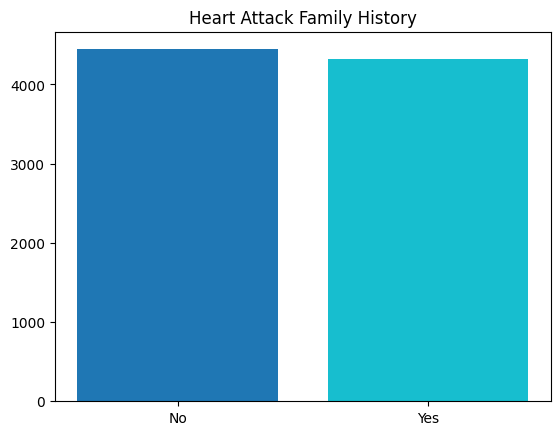

In [346]:
def plot():
    words = ['No', 'Yes'] # 그래프에서 보일 x축 항목 표시 단어
    freq = [frequency_0, frequency_1] # 그래프에서 보일 y축 항목 표시 값 범위
    
    plt.bar(words, freq, color=['tab:blue', 'tab:cyan']) # 막대그래프로 구현
    plt.title('Heart Attack Family History') # plot 제목
plot()

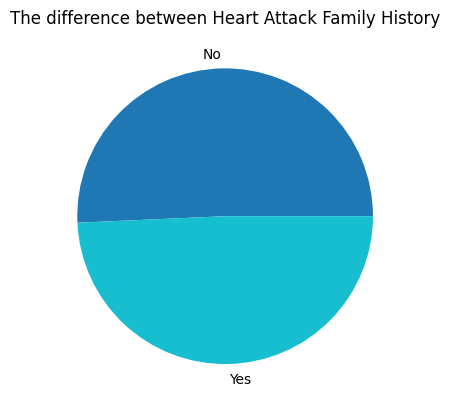

In [347]:
words = ['No', 'Yes'] # 그래프에서 보일 x축 항목 표시 단어
freq = [frequency_0, frequency_1] # 그래프에서 보일 y축 항목 표시 값

plt.pie(freq, labels=words, colors=['tab:blue', 'tab:cyan']) # pie모양 그래프
plt.title('The difference between Heart Attack Family History') # plot 제목
plt.show()

In [348]:
word = '0' # 검색할 word 지정
column = 'Heart Attack Risk' # 검색할 column 지정
frequency_0 = word_count(word, column) # Family History의 값이 0인 항목들

print(f'The word "{word}" appears {frequency_0} times in the column "{column}".')

The word "0" appears 5624 times in the column "Heart Attack Risk".


In [349]:
word = '1' # 검색할 word 지정
column = 'Heart Attack Risk' # 검색할 column 지정
frequency_1 = word_count(word, column) # Family History의 값이 0인 항목들

print(f'The word "{word}" appears {frequency_1} times in the column "{column}".')

The word "1" appears 3139 times in the column "Heart Attack Risk".


In [350]:
df_HAR_0 = df[df['Heart Attack Risk'] == 0] # Heart Attack Risk column에서 0인 값.
df_HAR_1 = df[df['Heart Attack Risk'] == 1] # Heart Attack Risk column에서 1인 값.

n = min(len(df_HAR_0), len(df_HAR_1)) # Smaller Group에서 행 수 찾기.
df_HAR_0_balanced = df_HAR_0.sample(n, replace=False) # 대체하지않는 임의의 n행 표본 추출

df_balanced = pd.concat([df_HAR_0_balanced, df_HAR_1]) # Smaller Group과 Baalanced Group을 df_balanced로 연결한다.
df = df_balanced
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
7840,UFD9485,64,Male,191,117/67,57,1,0,1,1,...,2.919407,244834,18.597818,174,0,9,Germany,Europe,Northern Hemisphere,0
25,MSW4208,90,Male,159,140/95,52,0,0,1,0,...,1.216510,110213,26.072026,667,4,5,Spain,Europe,Southern Hemisphere,0
7167,EMJ4145,77,Female,340,98/71,105,1,1,1,1,...,3.960824,243562,24.060857,394,5,4,United Kingdom,Europe,Northern Hemisphere,0
2641,COU2358,18,Female,175,170/99,94,0,0,0,0,...,1.733111,144718,21.816513,166,1,5,Nigeria,Africa,Northern Hemisphere,0
4859,OMJ2303,67,Male,254,175/90,107,1,0,1,0,...,4.308290,71014,34.622069,48,6,10,United States,North America,Northern Hemisphere,0


기존의 word count의 값을 보면  
**frequency_0**의 경우 **5624**개의 항목이 존재했고,  
**frequency_1**의 경우 **3139**개의 항목이 존재했다.

하지만 **n = min(len(df_HAR_0), len(df_HAR_1))** 로 인해  
**df_HAR_0**과 **df_HAR_1**의 길이 중 가장 적은 **df_HAR_1**의 값인 **3139**로 동기화되었다.

In [351]:
word = '0'
column = 'Heart Attack Risk'
frequency_fixed_0 = word_count(word, column)
print(f'The word "{word}" appears {frequency_fixed_0} times in the column "{column}".')

The word "0" appears 3139 times in the column "Heart Attack Risk".


In [352]:
word = '1'
column = 'Heart Attack Risk'
frequency_fixed_1 = word_count(word, column)
print(f'The word "{word}" appears {frequency_fixed_1} times in the column "{column}".')

The word "1" appears 3139 times in the column "Heart Attack Risk".


In [353]:
# DataFrame으로 부터 특정 비율(fraction)으로 무작위 표본 추출 / ps.특정 개수 = df.sample(n=?)
df = df.sample(frac=True) # frac=True == frac=1.0
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
5054,XAC9623,25,Male,177,146/77,90,1,1,1,0,...,5.792386,296623,37.864548,367,7,9,South Korea,Asia,Northern Hemisphere,0
913,UKF5251,84,Male,197,169/86,51,1,0,1,1,...,7.561734,73642,33.479077,419,7,4,Nigeria,Africa,Northern Hemisphere,0
7796,UJL7676,18,Male,381,126/68,42,1,1,1,1,...,6.502667,244061,39.204288,379,3,9,United States,North America,Northern Hemisphere,0
500,RQS7383,48,Male,312,121/95,95,1,0,1,1,...,5.788607,250386,23.185343,780,4,9,China,Asia,Northern Hemisphere,0
2032,OWT7676,28,Male,392,90/92,89,1,1,1,0,...,9.500813,190702,23.323037,174,3,5,South Korea,Asia,Northern Hemisphere,1


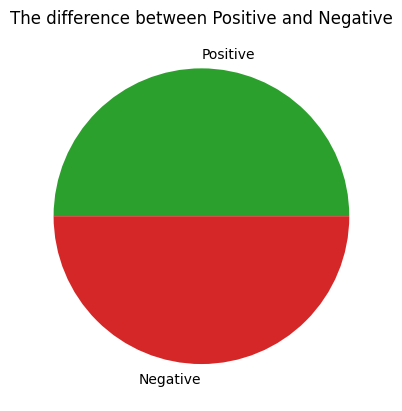

In [354]:
words = ['Positive', 'Negative']
frequency = [frequency_fixed_1, frequency_fixed_0]

plt.pie(frequency, labels=words, colors=['tab:green', 'tab:red'])
plt.title('The difference between Positive and Negative')
plt.show()

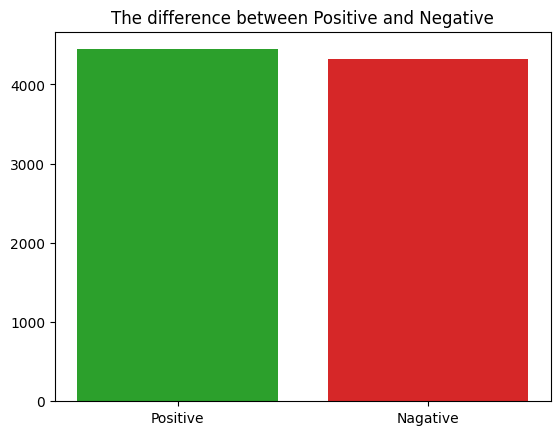

In [355]:
words = ['Positive', 'Nagative']
frequency = [frequency_fixed_1, frequency_fixed_0]

plt.bar(words,freq, color=['tab:green', 'tab:red'])
plt.title('The difference between Positive and Negative')
plt.show()

In [356]:
df = df.sample(frac=True)

x = df.drop('Heart Attack Risk', axis='columns') # columns열의 Heart Attack Risk 레이블 삭제
# pd.get_dummines : 결측값을 제외하고 0과 1로 구성된 더미값이 만들어진다. / 더미값을 float로 변환
x = pd.get_dummies(x).astype(float) 

y = df['Heart Attack Risk']
y = pd.get_dummies(y).astype(float)

x.head(10)

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,Country_United States,Country_Vietnam,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America,Hemisphere_Northern Hemisphere,Hemisphere_Southern Hemisphere
6570,19.0,358.0,106.0,1.0,0.0,1.0,0.0,0.0,10.035035,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3077,22.0,335.0,104.0,1.0,1.0,1.0,0.0,0.0,16.780378,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5914,56.0,352.0,108.0,0.0,1.0,1.0,1.0,1.0,8.237120,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2480,79.0,208.0,97.0,1.0,0.0,1.0,1.0,1.0,10.476111,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4429,62.0,120.0,74.0,0.0,0.0,1.0,1.0,1.0,1.545719,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4633,87.0,301.0,81.0,1.0,0.0,1.0,0.0,1.0,14.971758,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5912,46.0,243.0,62.0,0.0,1.0,1.0,1.0,0.0,15.670260,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5492,88.0,312.0,65.0,1.0,0.0,1.0,0.0,0.0,1.645685,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
495,82.0,266.0,102.0,0.0,1.0,1.0,0.0,1.0,3.374700,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2625,26.0,235.0,86.0,1.0,0.0,0.0,0.0,1.0,0.076577,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [357]:
y.head(10)

,0,1
6570,0.0,1.0
3077,0.0,1.0
5914,1.0,0.0
2480,1.0,0.0
4429,1.0,0.0
4633,0.0,1.0
5912,0.0,1.0
5492,1.0,0.0
495,1.0,0.0
2625,1.0,0.0


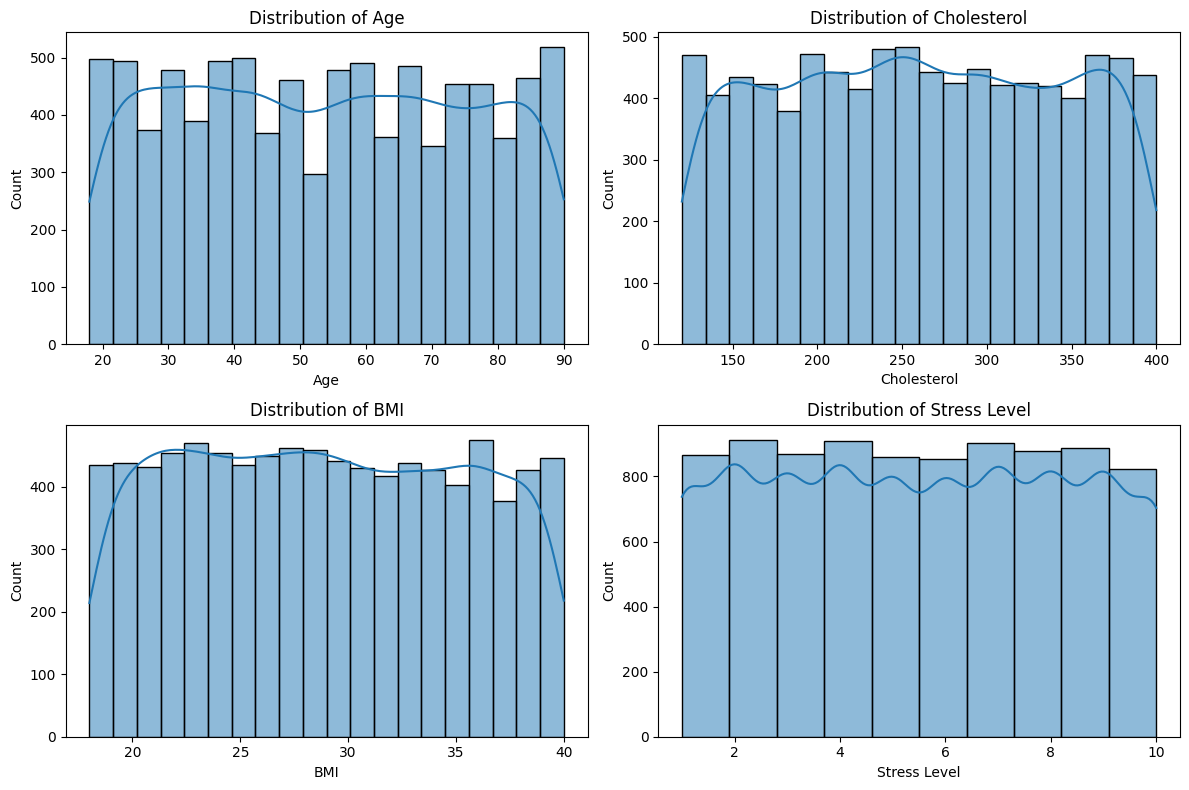

In [358]:
df = pd.read_csv('/kaggle/input/heart-attack-prediction-dataset/heart_attack_prediction_dataset.csv')

plt.figure(figsize=(12, 8)) # 창 크기 설정

# Age의 분포 그래프
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Distribution of Age')

# Colesterol의 분포 그래프
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='Cholesterol', bins=20, kde=True)
plt.title('Distribution of Cholesterol')

# BMI의 분포 그래프
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='BMI', bins=20, kde=True)
plt.title('Distribution of BMI')

# Stress Level의 분포 그래프
plt.subplot(2, 2, 4)
sns.histplot(data=df, x='Stress Level', bins=10, kde=True)
plt.title('Distribution of Stress Level')

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



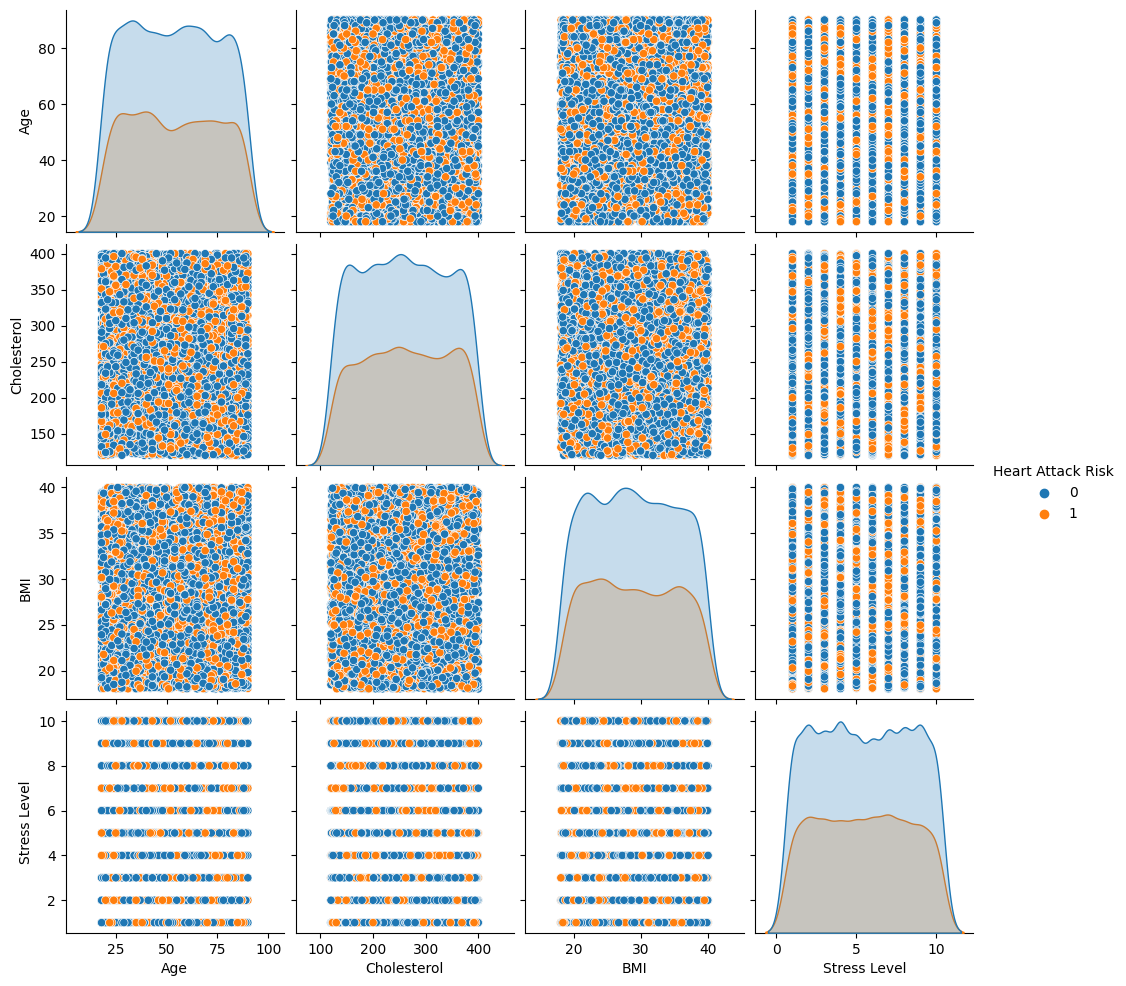

In [359]:
# seaborn의 pairplot은 데이터프레임의 짝 지울 수 있는 모든 조합에 대해 표현해줌.
# data=대상이 되는 DataFrame, vars=변수로 현재 변수가 4개가 있어 4X4 형태로 만들어짐.
# hue=Heart Attack Risk의 값에 따라 나눠서 그림.
# diag_kind=대각선 그래프는 kde(밀도)함수로 표현.
#df = df.sample(frac=0.01, replace=True)
sns.pairplot(data=df, vars=['Age', 'Cholesterol', 'BMI', 'Stress Level'], hue='Heart Attack Risk', diag_kind='kde')
plt.show()

In [360]:
# Data type이 int64, float64인 데이터만 포함시킴
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_columns.corr() # numeric_columns열 간의 상관계수 반환
numeric_columns.head(), corr_matrix.head()

(   Age  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  Obesity  \
 0   67          208          72         0               0        1        0   
 1   21          389          98         1               1        1        1   
 2   21          324          72         1               0        0        0   
 3   84          383          73         1               1        1        0   
 4   66          318          93         1               1        1        1   
 
    Alcohol Consumption  Exercise Hours Per Week  Previous Heart Problems  \
 0                    0                 4.168189                        0   
 1                    1                 1.813242                        1   
 2                    0                 2.078353                        1   
 3                    1                 9.828130                        1   
 4                    0                 5.804299                        1   
 
    Medication Use  Stress Level  Sedentary Hours Per 

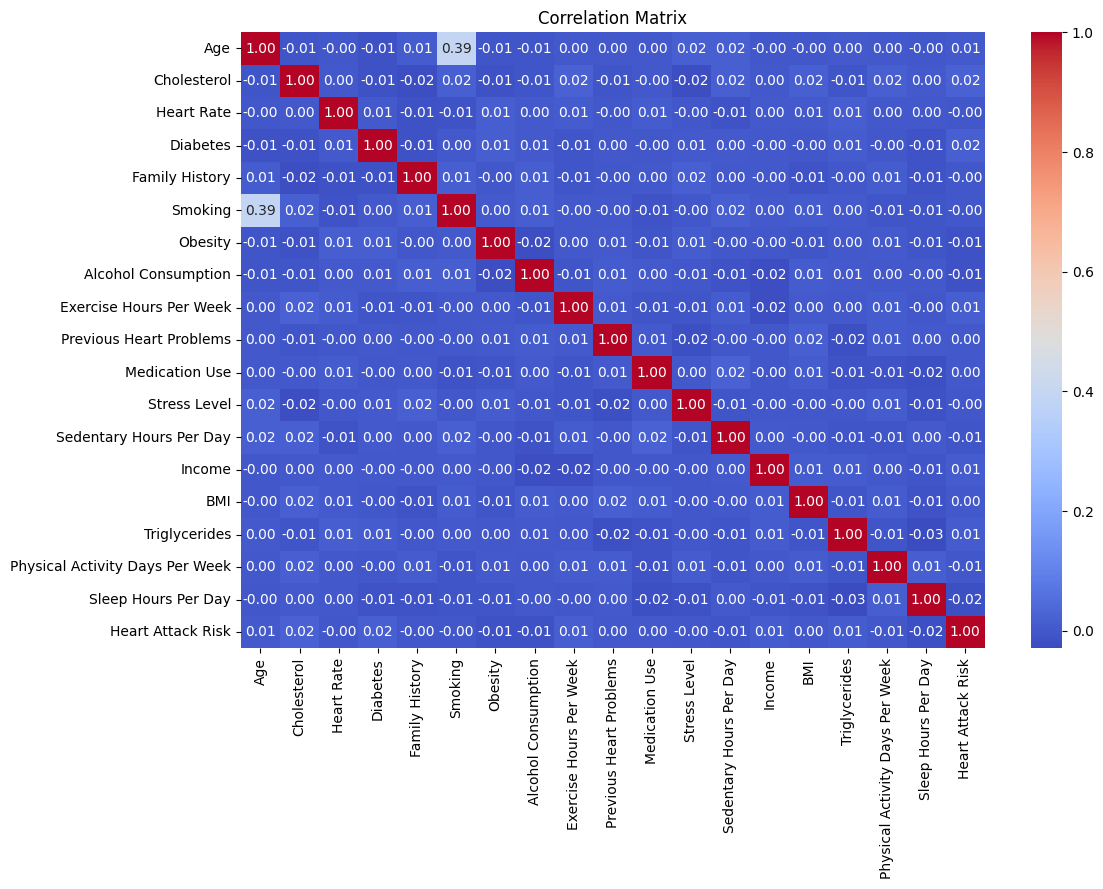

In [361]:
plt.figure(figsize=(12, 8))
# data:corr_matrix, annot=각 cell의 값 표기 유무, cmap=HeatMap의 색상 설정, fmt=값의 데이터타입
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [362]:
import plotly.express as px

# 위와 같이 Data type이 int64, float64인 데이터만 포함시킴
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_columns.corr() # numeric_columns열 간의 상관계수 반환

# imshow는 원하는 크기의 행렬을 만들어 색의 정도로 값을 표현하는 이미지맵.
# 데이터:corr_matrix, x=numeric_columns 데이터의 컬럼들, y=numeric_columns 데이터의 컬럼들
# color_continuous_scale=Plotly ColorMap의 설정된 컬러맵들 호출, title=표 제목 설정
fig_corr_matrix = px.imshow(corr_matrix, x=numeric_columns.columns, y=numeric_columns.columns, color_continuous_scale='Viridis')

# update_layout()은 그래프 생성 완료 후 layout정보를 업데이트해줌.
# tittle_text=제목 역할, title_x=원하는 값 만큼 이동, title_xanchor=제목 글 정렬
fig_corr_matrix.update_layout(width=800, height=800, title_text="Interactie Correltion Matrix", title_x=0.5, title_xanchor='center')
fig_corr_matrix.show()

In [363]:
# 특정 컬러 변수의 값들(단어)의 집합에서 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고 
# 다른 익덱스에는 0을 부여해 단어의 벡터를 표현한다. / 지정한 column에 대해서만 one-hot-encoding
# drop_first=첫 번째의 범주(column)에 대해서는 dummy 변수값을 할당하지 않고 
# 나머지 범주의 여집합으로 표현한다.
# dummy_na=True로 할 경우 값이 존재하지않는 NaN에도 dummy값이 0으로 생긴다.
df = pd.get_dummies(df, columns=['Sex', 'Blood Pressure', 'Diet', 'Country', 
                                  'Continent', 'Hemisphere'], drop_first=True, dummy_na=True)
df.head()

,Patient ID,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Country_Vietnam,Country_nan,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America,Continent_nan,Hemisphere_Southern Hemisphere,Hemisphere_nan
0,BMW7812,67,208,72,0,0,1,0,0,4.168189,...,False,False,False,False,False,False,True,False,True,False
1,CZE1114,21,389,98,1,1,1,1,1,1.813242,...,False,False,False,False,False,True,False,False,False,False
2,BNI9906,21,324,72,1,0,0,0,0,2.078353,...,False,False,False,False,True,False,False,False,False,False
3,JLN3497,84,383,73,1,1,1,0,1,9.828130,...,False,False,False,False,False,True,False,False,False,False
4,GFO8847,66,318,93,1,1,1,1,0,5.804299,...,False,False,True,False,False,False,False,False,False,False


In [371]:
# 전처리 방식 중 하나인 정규화=MinMaxScaler 사용 / 표준화=StandardScaler
# 정규화는 모든 값을 0~1사이의 값으로 변경한다.
# ex. MAX=10, min=2일때 4를 정규화하면 (4-2)/(10-2)=0.25 로 정규화가 된다.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# 정규화할 column대상 지정
columns_to_scale=['Age', 'Cholesterol', 'BMI']

# fit_transform()은 fit()과 transform()을 한번에 처리할 수 있는 method인데
# fit()은 데이터를 학습시키는 method이고 transform()은 학습시킨 것을 적용하는 method이다.
# 이로인해 테스트 학습데이터에서는 fit_transform Method를 사용하면 안된다.(학습데이터까지 영향을 줌)
# scaler.fit_transform(전처리 대상)
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df[columns_to_scale].head(10)

,Age,Cholesterol,BMI
0,0.680556,0.314286,0.602363
1,0.041667,0.960714,0.417945
2,0.041667,0.728571,0.462573
3,0.916667,0.939286,0.839394
4,0.666667,0.707143,0.173077
5,0.500000,0.632143,0.097500
6,1.000000,0.850000,0.494819
7,0.916667,0.357143,0.191841
8,0.027778,0.089286,0.809623
9,0.347222,0.457143,0.207166


In [372]:
# 손실 데이터 확인
missing_data = df.isnull().sum()

df = df.dropna()
df = df.drop_duplicates()
df.head()

,Patient ID,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Country_Vietnam,Country_nan,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America,Continent_nan,Hemisphere_Southern Hemisphere,Hemisphere_nan
0,BMW7812,0.680556,0.314286,72,0,0,1,0,0,4.168189,...,False,False,False,False,False,False,True,False,True,False
1,CZE1114,0.041667,0.960714,98,1,1,1,1,1,1.813242,...,False,False,False,False,False,True,False,False,False,False
2,BNI9906,0.041667,0.728571,72,1,0,0,0,0,2.078353,...,False,False,False,False,True,False,False,False,False,False
3,JLN3497,0.916667,0.939286,73,1,1,1,0,1,9.828130,...,False,False,False,False,False,True,False,False,False,False
4,GFO8847,0.666667,0.707143,93,1,1,1,1,0,5.804299,...,False,False,True,False,False,False,False,False,False,False


In [374]:
# Cholesterol column과 BMI column을 split한 Chol_BMI_Ratio라는 새로운 column 생성.
df['Chol_BMI_Ratio'] = df['Cholesterol'] / df['BMI']
df['Chol_BMI_Ratio'].head()

0    0.521755
1    2.298665
2    1.575041
3    1.119004
4    4.085712
Name: Chol_BMI_Ratio, dtype: float64

In [384]:
from sklearn.model_selection import train_test_split

# 대상변수인 Y와 X 정의
X = df.drop(columns=['Patient ID', 'Heart Attack Risk'])
Y = df['Heart Attack Risk']

# DataSet을 TrainingSet에 80%, TestSet에 20%로 나눠 할당. / test_size로 샘플링 할당량 설정
# random_state는 호출할 때마다 동일한 Training/Test DataSet을 생성하기 위해 주어지는 난수 값.
# random_state에는 어떤 숫자를 적든 그 기능은 같기 때문에 어떤 숫자를 적던 상관없다
X_train, X_test, Y_train, Y_test = \
train_test_split(X, Y, test_size=0.2, random_state=10)

# DataSet들의 결과 형태 확인 및 출력
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (7010, 3967)
X_test shape: (1753, 3967)
Y_train shape: (7010,)
Y_test shape: (1753,)
